# Import libraries and read data

In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

sns.set()

In [2]:
# global data
confirmed_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# U.S. data
confirmed_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

In [3]:
# global data
confirmed_global_df = pd.read_csv(confirmed_global_path)
deaths_global_df = pd.read_csv(deaths_global_path)
recovered_global_df = pd.read_csv(recovered_global_path)

# U.S data
confirmed_us_df = pd.read_csv(confirmed_us_path)
deaths_us_df = pd.read_csv(deaths_us_path)

# Get to know the data:

## Globally confirmed cases:

In [4]:
confirmed_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [5]:
confirmed_global_df.shape

(258, 77)

## Globally deaths:

In [6]:
deaths_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2


In [7]:
deaths_global_df.shape

(258, 77)

## Globally recovered cases:

In [8]:
recovered_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,2,2,5,5,10,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,17,31,31,33,44,52,67,76,89
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,29,29,31,31,37,46,61,61,62
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,10,10,10,10,16
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [9]:
recovered_global_df.shape

(244, 77)

## U.S. confirmed cases:

In [10]:
confirmed_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,37,45,51,55,56,58,69,77,82,84
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,2,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,51,64,79,100,127,174,239,286,316,316
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,17,17,19,22,0,0,30,30,30,37


In [11]:
confirmed_us_df.shape

(3253, 84)

## U.S. deaths:

In [12]:
deaths_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,1,1,1,1,2,3,3,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,0,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2,2,3,3,3,6,8,11,12,15
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,0


In [13]:
deaths_us_df.shape

(3253, 85)

## Summary:

The three datasets share the same structure, and have the same fields, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
Fields descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the *cumulative* number of cases up until this date.

It can be seen that the `U.S.` dataset differs from the `global` one, as it has these additional columns: UID, iso2, iso3, code3, FIPS (we'll get to them later)

# Data Preprocessing:

In [14]:
# global data
print(f'Globally confirmed cases: {confirmed_global_df.shape}')
print(f'Globally deaths: {deaths_global_df.shape}')
print(f'Globally recovered cases: {recovered_global_df.shape}')

# U.S. data
print(f'U.S. Confirmed cases: {confirmed_us_df.shape}')
print(f'U.S. deaths: {deaths_us_df.shape}')

Globally confirmed cases: (258, 77)
Globally deaths: (258, 77)
Globally recovered cases: (244, 77)
U.S. Confirmed cases: (3253, 84)
U.S. deaths: (3253, 85)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

@**Qusai** what do you think? (BTW, no way to mention to other users in jupyter lab, google colab has this feature :|)

## 1 - Drop irrelevant columns:
`Lat` and `Long` columns specify the coordinates of the case, we won't be needing this inofrmation right now.

In [15]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [16]:
irrelevant_columns = ['Lat', 'Long']

In [17]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, irrelevant_columns)
deaths_global_df = drop_irrelevant_columns(deaths_global_df, irrelevant_columns)
recovered_global_df = drop_irrelevant_columns(recovered_global_df, irrelevant_columns)

In [18]:
confirmed_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,0,0,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [19]:
deaths_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2


In [20]:
recovered_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,5,5,10,10
1,NaN,Albania,0,0,0,0,0,0,0,0,...,17,17,31,31,33,44,52,67,76,89
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,65,29,29,31,31,37,46,61,61,62
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,10,10,10,10,16
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


Also, drop columns `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Admin2`, `Combined_Key` from the `U.S.` data:

In [21]:
irrelevant_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key']

In [22]:
confirmed_us_df = drop_irrelevant_columns(confirmed_us_df, irrelevant_columns)
deaths_us_df = drop_irrelevant_columns(deaths_us_df, irrelevant_columns)

In [23]:
confirmed_us_df.head()

,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,American Samoa,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,0,0,0,0,0,0,0,0,...,37,45,51,55,56,58,69,77,82,84
2,Northern Mariana Islands,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,6,6,6
3,Puerto Rico,US,0,0,0,0,0,0,0,0,...,51,64,79,100,127,174,239,286,316,316
4,Virgin Islands,US,0,0,0,0,0,0,0,0,...,17,17,19,22,0,0,30,30,30,37


In [24]:
deaths_us_df.head()

,Province_State,Country_Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,3,3,4
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,2,2,3,3,3,6,8,11,12,15
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


only deaths data has the column `Population`, but it should the same for the confirmed data also.

In [25]:
confirmed_us_df.insert(2, 'Population', deaths_us_df['Population'])

In [26]:
confirmed_us_df.head()

,Province_State,Country_Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,37,45,51,55,56,58,69,77,82,84
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,6,6,6
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,51,64,79,100,127,174,239,286,316,316
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,17,17,19,22,0,0,30,30,30,37


## 2 - Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `State` and `Country` respectively.

In [27]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [28]:
columns_mapping = {
    'Province/State': 'State',
    'Province_State': 'State',
    'Country/Region': 'Country',
    'Country_Region': 'Country'
}

In [29]:
# global data
confirmed_global_df = rename_columns(confirmed_global_df, columns_mapping)
deaths_global_df = rename_columns(deaths_global_df, columns_mapping)
recovered_global_df = rename_columns(recovered_global_df, columns_mapping)

# U.S. data
confirmed_us_df = rename_columns(confirmed_us_df, columns_mapping)
deaths_us_df = rename_columns(deaths_us_df, columns_mapping)

### Global data:

In [30]:
confirmed_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,0,0,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [31]:
deaths_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2


In [32]:
recovered_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,5,5,10,10
1,NaN,Albania,0,0,0,0,0,0,0,0,...,17,17,31,31,33,44,52,67,76,89
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,65,29,29,31,31,37,46,61,61,62
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,10,10,10,10,16
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


### U.S. data:

In [33]:
confirmed_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,37,45,51,55,56,58,69,77,82,84
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,6,6,6
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,51,64,79,100,127,174,239,286,316,316
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,17,17,19,22,0,0,30,30,30,37


In [34]:
deaths_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,3,3,4
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,2,2,3,3,3,6,8,11,12,15
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3 - Drop `State` column from the global data:
most records of the global data doesn't have `State` value, so it's better to drop it.

In [35]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, 'State')
deaths_global_df = drop_irrelevant_columns(deaths_global_df, 'State')
recovered_global_df = drop_irrelevant_columns(recovered_global_df, 'State')

In [36]:
confirmed_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,Albania,0,0,0,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,Algeria,0,0,0,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,Andorra,0,0,0,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,Angola,0,0,0,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [37]:
deaths_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,Albania,0,0,0,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,Algeria,0,0,0,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2


In [38]:
recovered_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,5,5,10,10
1,Albania,0,0,0,0,0,0,0,0,0,...,17,17,31,31,33,44,52,67,76,89
2,Algeria,0,0,0,0,0,0,0,0,0,...,65,29,29,31,31,37,46,61,61,62
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,10,10,10,10,16
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


## 4 - Aggregate data by countries for global data:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases at each day for each country.

aggregate global data:

In [39]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [40]:
by_column = 'Country'

In [41]:
# global
confirmed_global_agg_df = apply_aggregation(confirmed_global_df, by_column)
deaths_global_agg_df = apply_aggregation(deaths_global_df, by_column)
recovered_global_agg_df = apply_aggregation(recovered_global_df, by_column)
# TODO:
# aggregate the U.S. data by `state`
# confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_column)
# deaths_us_agg_df = apply_aggregation(deaths_us_df, by_column)

In [42]:
confirmed_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,Albania,0,0,0,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,Algeria,0,0,0,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,Andorra,0,0,0,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,Angola,0,0,0,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [43]:
deaths_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,Albania,0,0,0,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,Algeria,0,0,0,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2


In [44]:
recovered_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,5,5,10,10
1,Albania,0,0,0,0,0,0,0,0,0,...,17,17,31,31,33,44,52,67,76,89
2,Algeria,0,0,0,0,0,0,0,0,0,...,65,29,29,31,31,37,46,61,61,62
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,10,10,10,10,16
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


aggregate U.S. data:

In [45]:
by_columns = ['Country', 'State']

In [46]:
confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_columns)
deaths_us_agg_df = apply_aggregation(deaths_us_df, by_columns)

In [47]:
confirmed_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,381,517,587,694,825,899,987,1060,1233,1495
1,US,Alaska,731545,0,0,0,0,0,0,0,...,41,56,58,85,102,114,119,132,143,157
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,1,1,1,...,401,508,665,773,919,1157,1289,1530,1715,1937
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,280,335,381,409,426,473,523,584,643,704


In [48]:
deaths_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,1,1,4,4,10,10,23,27,32,38
1,US,Alaska,731545,0,0,0,0,0,0,0,...,1,1,1,2,2,3,3,3,3,3
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,0,0,0,...,6,8,13,15,17,20,24,29,32,41
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,2,2,3,5,6,7,8,10,12,12


## 5 - create `Population` dataframe for the `U.S.` data:

Later, we will convert the data to time series structure, and the value of `Population` shouldn't be in a time series data, as it doesn't change over time, it's rather a characteristic of the state.

In [49]:
us_population_df = confirmed_us_agg_df[['Country', 'State', 'Population']]

In [50]:
confirmed_us_agg_df = drop_irrelevant_columns(confirmed_us_agg_df, ['Population'])
deaths_us_agg_df = drop_irrelevant_columns(deaths_us_agg_df, ['Population'])

In [51]:
confirmed_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,381,517,587,694,825,899,987,1060,1233,1495
1,US,Alaska,0,0,0,0,0,0,0,0,...,41,56,58,85,102,114,119,132,143,157
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,1,1,1,1,...,401,508,665,773,919,1157,1289,1530,1715,1937
4,US,Arkansas,0,0,0,0,0,0,0,0,...,280,335,381,409,426,473,523,584,643,704


In [52]:
deaths_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,1,1,4,4,10,10,23,27,32,38
1,US,Alaska,0,0,0,0,0,0,0,0,...,1,1,1,2,2,3,3,3,3,3
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,0,0,0,0,...,6,8,13,15,17,20,24,29,32,41
4,US,Arkansas,0,0,0,0,0,0,0,0,...,2,2,3,5,6,7,8,10,12,12


## 5 - Restructe the Data:
convert the data into an easier structure, add column `date`, and change the columns to br rows (for easier manipulation)

In [53]:
date_columns = confirmed_global_agg_df.filter(regex='\d{1,2}/\d{1,2}/\d{1,4}').columns.values

In [54]:
def construct_date_df(df, date_column_name, copy_columns, value_column_name):
    
    data = {}
    
    data['date'] = date_column_name
    
    for column in copy_columns:
        data[column] = df[column]
    
    data[value_column_name] = df[date_column_name]
    
    date_df = pd.DataFrame(data=data)
    
    return date_df

In [55]:
# global data
confirmed_global_date_frames = [construct_date_df(confirmed_global_agg_df, date_column, ['Country'], 'confirmed') for date_column in date_columns]
deaths_global_date_frames = [construct_date_df(deaths_global_agg_df, date_column, ['Country'], 'deaths') for date_column in date_columns]
recovered_global_date_frames = [construct_date_df(recovered_global_agg_df, date_column, ['Country'], 'recovered') for date_column in date_columns]

# U.S. data
confirmed_us_date_frames = [construct_date_df(confirmed_us_agg_df, date_column, ['Country', 'State'], 'confirmed') for date_column in date_columns]
deaths_us_date_frames = [construct_date_df(deaths_us_agg_df, date_column, ['Country', 'State'], 'deaths') for date_column in date_columns]

In [56]:
# global data
confirmed_global_time_series = pd.concat(confirmed_global_date_frames)
deaths_global_time_series = pd.concat(deaths_global_date_frames)
recovered_global_time_series = pd.concat(recovered_global_date_frames)

# U.S. data
confirmed_us_time_series = pd.concat(confirmed_us_date_frames)
deaths_us_time_series = pd.concat(deaths_us_date_frames)

In [57]:
confirmed_global_time_series.head()

,date,Country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [58]:
deaths_global_time_series.head()

,date,Country,deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [59]:
recovered_global_time_series.head()

,date,Country,recovered
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [60]:
confirmed_us_time_series.head()

,date,Country,State,confirmed
0,1/22/20,US,Alabama,0
1,1/22/20,US,Alaska,0
2,1/22/20,US,American Samoa,0
3,1/22/20,US,Arizona,0
4,1/22/20,US,Arkansas,0


In [61]:
deaths_us_time_series.head()

,date,Country,State,deaths
0,1/22/20,US,Alabama,0
1,1/22/20,US,Alaska,0
2,1/22/20,US,American Samoa,0
3,1/22/20,US,Arizona,0
4,1/22/20,US,Arkansas,0


in the rest of the notebook, we will focus on the following three dataframes:
- `confirmed_time_series`: time series of the confirmed cases.
- `deaths_time_series`: time series of the deaths.
- `recovered_time_series`: time series of the recovered cases.

A *time series* data shows the change in a *statiscal variable* according to *time*.<br>
Each row in the previous time series is a tuple of date, country, and measure, the measure represents the cumulative sum in the country, up until the date.

## 6 - Focus on *Outbreaks*:
We will focus in this notebook only on countries with high **death tolls**, countires that are nearly affected by the pandemic will be discarded.

In [62]:
last_day = deaths_global_time_series['date'].values[-1]

In [63]:
most_affected_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                                            .sort_values(by='deaths', ascending=False)\
                                                                            [:10]

In [64]:
most_affected_countries

,date,Country,deaths
84,4/3/20,Italy,14681
154,4/3/20,Spain,11198
169,4/3/20,US,7087
61,4/3/20,France,6520
173,4/3/20,United Kingdom,3611
36,4/3/20,China,3326
80,4/3/20,Iran,3294
120,4/3/20,Netherlands,1490
65,4/3/20,Germany,1275
16,4/3/20,Belgium,1143


In [65]:
most_affected_countries_names = most_affected_countries['Country'].values

Create time series for most affected countries:

In [66]:
most_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country'].isin(most_affected_countries_names)]

In [67]:
most_deaths_time_series.head()

,date,Country,deaths
16,1/22/20,Belgium,0
36,1/22/20,China,17
61,1/22/20,France,0
65,1/22/20,Germany,0
80,1/22/20,Iran,0


In [68]:
most_confirmed_time_series = confirmed_global_time_series[confirmed_global_time_series['Country'].isin(most_affected_countries_names)]

In [69]:
most_confirmed_time_series.head()

,date,Country,confirmed
16,1/22/20,Belgium,0
36,1/22/20,China,548
61,1/22/20,France,0
65,1/22/20,Germany,0
80,1/22/20,Iran,0


In [70]:
most_recovered_time_series = recovered_global_time_series[recovered_global_time_series['Country'].isin(most_affected_countries_names)]

In [71]:
most_recovered_time_series.head()

,date,Country,recovered
16,1/22/20,Belgium,0
36,1/22/20,China,28
61,1/22/20,France,0
65,1/22/20,Germany,0
80,1/22/20,Iran,0


# Data Visualization:

## Line Chart:

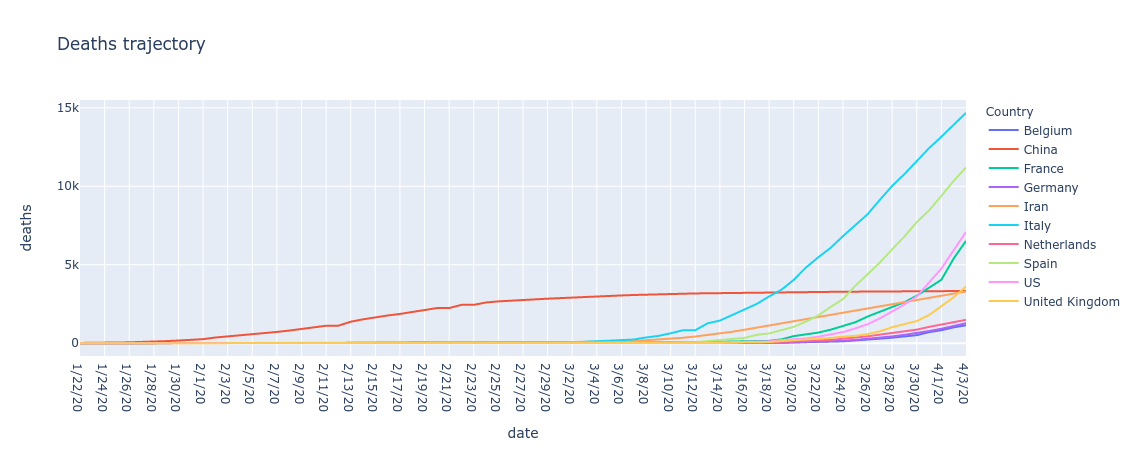

In [72]:
fig = px.line(data_frame=most_deaths_time_series, x='date', y='deaths', color='Country', line_group='Country', title='Deaths trajectory')
fig.show()

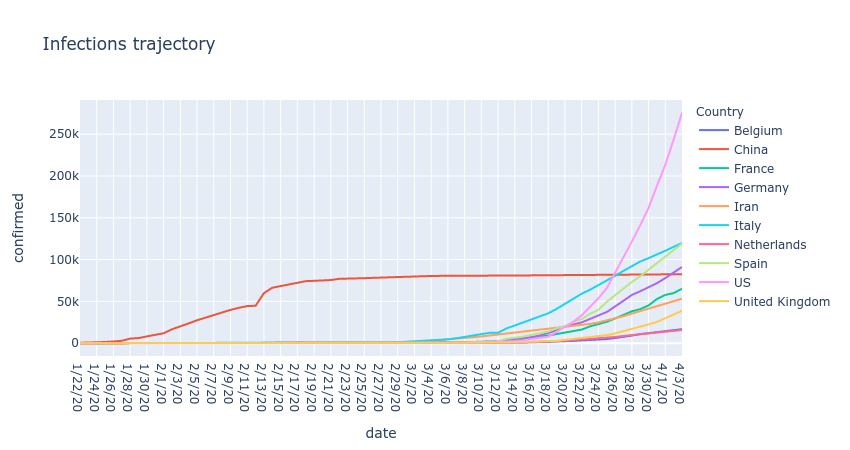

In [73]:
fig = px.line(data_frame=most_confirmed_time_series, x='date', y='confirmed', color='Country', line_group='Country', title='Infections trajectory')
fig.show()

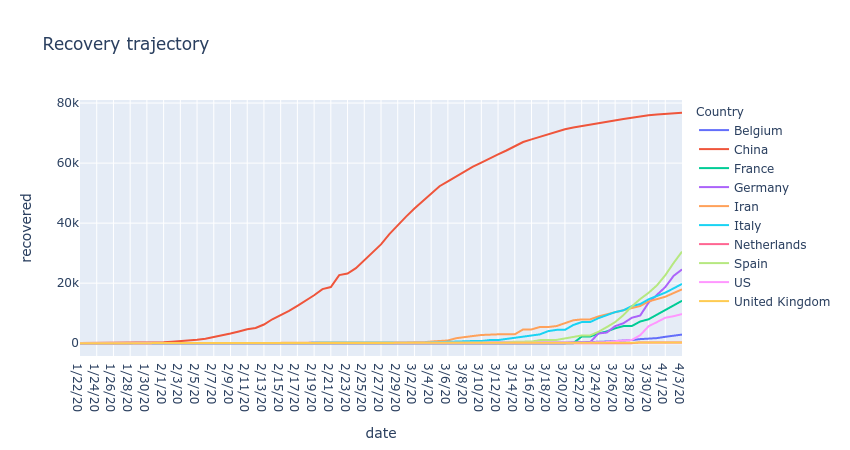

In [74]:
fig = px.line(data_frame=most_recovered_time_series, x='date', y='recovered', color='Country', line_group='Country', title='Recovery trajectory')
fig.show()

`TODO`:
- investigate the date of the lockdown applied by each country, and study how it affected the growth of cases (in general)
- try to model the grow of countries by *Mathematical functions*, China for example is like the `sigmoid` function, while other counter countries like Italy, Spain, ... are more like `exponential` function (good resource for this: [Estimating actual COVID 19 cases (novel corona virus infections) in an area based on deaths](https://www.youtube.com/watch?v=mCa0JXEwDEk))

## Choropleth Map:

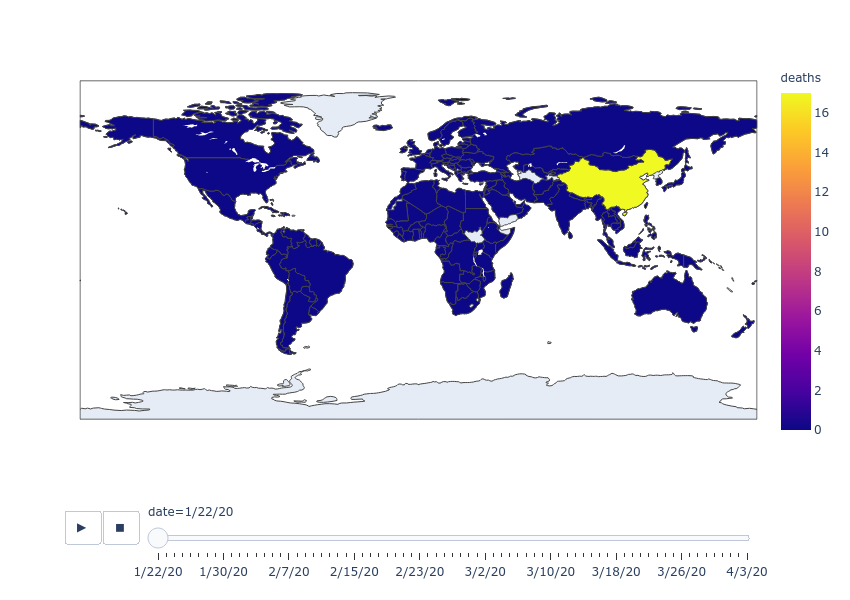

In [75]:
fig = px.choropleth(data_frame=deaths_global_time_series, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths', animation_frame='date',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    width=1000, height=600)
fig.show()

## U.S. Choropleth:

In [76]:
# lookup_df = pd.read_csv('COVID-19/csse_covid_19_data/us_states_abbrevations.csv')

In [77]:
# lookup_df.head()

In [78]:
# confirmed_us_time_series.head()

In [79]:
# temp_df = confirmed_us_time_series.merge(lookup_df[['State', 'Code']],
#                                 left_on='State',
#                                 right_on='State',
#                                 how='inner')

In [80]:
# temp_df.head()

In [81]:
# fig = px.choropleth(data_frame=temp_df,
#                     locations='Code',
#                     locationmode="USA-states",
#                     color='confirmed',
#                     animation_frame='date',
#                     scope="usa")
# fig.show()

## Bubble Map:

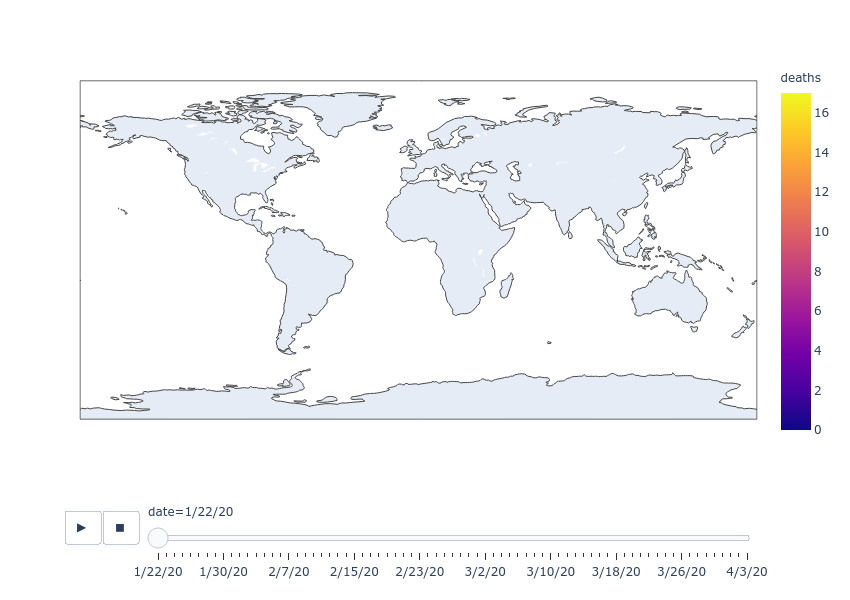

In [82]:
fig = px.scatter_geo(data_frame=deaths_global_time_series, locations='Country',
                     locationmode='country names', color='deaths',
                     hover_name='deaths', animation_frame='date', size='deaths',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     width=1000, height=600)
fig.show()

In [83]:
first_day_of_100 = confirmed_global_time_series[confirmed_global_time_series['confirmed'] >= 100]\
                                                .groupby(by='Country')\
                                                .first()\
                                                .reset_index()

In [84]:
first_day_of_100.head()

,Country,date,confirmed
0,Afghanistan,3/27/20,110
1,Albania,3/23/20,104
2,Algeria,3/21/20,139
3,Andorra,3/22/20,113
4,Argentina,3/20/20,128


In [85]:
country_1 = 'Italy'
country_2 = 'China'